# برازش

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px;">
مراحل فیت کردن مدل  
<p style="font-family: 'B Nazanin'; font-size: 18px;">
انتخاب مدل
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    مدل ریاضی مناسب را بر اساس توزیع داده‌ها و ماهیت مسئله انتخاب خواهیم کرد.
<p style="font-family: 'B Nazanin'; font-size: 18px;">
تعریف تابع خطا
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    تابع خطای کای‌دو را به عنوان تابع هدف تعریف خواهیم کرد. این تابع باید تفاوت بین داده‌های مشاهده‌شده و پیش‌بینی‌شده را محاسبه کند.
<p style="font-family: 'B Nazanin'; font-size: 18px;">
بهینه‌سازی پارامترها
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    از الگوریتم‌های بهینه‌سازی (مانند minimize در کتابخانه scipy.optimize) برای کمینه کردن خطای کای‌دو استفاده خواهیم کرد.
<p style="font-family: 'B Nazanin'; font-size: 18px;">
ارزیابی مدل
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    پس از فیت کردن مدل، کیفیت آن را با استفاده از معیارهایی مانند مقدار کای‌دو نرمال‌شده (χ²/ndf) ارزیابی خواهیم کرد..

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px;">
توزیع گاوسی (نرمال) یکی از مهم‌ترین توزیع‌های احتمالی در فیزیک و آمار است.
<p style="font-family: 'B Nazanin'; font-size: 16px;">
 تابع چگالی احتمال آن به صورت زیر تعریف می‌شود

$ f(E; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(E - \mu)^2}{2\sigma^2}\right) $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px;">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    E: متغیر مستقل (مثلاً انرژی)
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    μ: میانگین توزیع
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    σ: انحراف معیار توزیع
    <p style="font-family: 'B Nazanin'; font-size: 16px;">
    error:میزان نویز (اگر صفر باشد، نویز اضافه نمی‌شود)
<p style="font-family: 'B Nazanin'; font-size: 16px;">
خروجی:
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    آرایه‌ای از مقادیر توزیع گاوسی
<p style="font-family: 'B Nazanin'; font-size: 16px;">
در کد زیر، تابع gaussian برای محاسبه توزیع گاوسی تعریف شده است. این تابع همچنین قابلیت افزودن نویز به داده‌ها را دارد.

In [1]:
import numpy as np

def gaussian(E, mean, sigma, error):
    ret = np.exp(-(E - mean)**2 / (2 * sigma**2))
    
    if error != 0:
        errors = np.random.normal(0, error, E.shape)
        ret += ret * errors
    
    return ret

___
<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
تولید شبکه‌ای از داده‌ها

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
برای بررسی رفتار توزیع گاوسی در محدوده‌های مختلف پارامترها، از شبکه‌سازی (Meshgrid) استفاده می‌شود.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
 این روش به ما امکان می‌دهد تا تمام ترکیبات ممکن از پارامترها را بررسی کنیم.
در کد زیر، از تابع np.meshgrid برای ایجاد شبکه‌ای از مقادیر انرژی (E)، میانگین‌ها (means) و انحراف معیارها (sigmas) استفاده شده است.

In [2]:
E = np.linspace(-5, 5, 20)
means = np.linspace(-1, 1, 50)
sigmas = np.linspace(0.1, 2, 100)

E_, means_, sigmas_ = np.meshgrid(E, means, sigmas)
allYs = gaussian(E_, means_, sigmas_, 0)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    E_, means_, sigmas_: شبکه‌های سه‌بعدی از مقادیر انرژی، میانگین و انحراف معیار
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    allYs: مقادیر توزیع گاوسی برای تمام ترکیبات ممکن

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">

 تحلیل داده‌ها با استفاده از معیار Chi-squared

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
معیار Chi-squared (χ2) برای مقایسه داده‌های تجربی با مدل نظری استفاده می‌شود. این معیار به صورت زیر تعریف می‌شود:

$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    Oi​: داده‌های تجربی
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    Ei​: داده‌های مدل نظری

In [3]:
data = gaussian(E, 0, 1, 0.1)
experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

chi2 = np.sum((experiment_new - allYs)**2, 1)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
برای نمایش نتایج، از نمودار دو بعدی با رنگ‌های لگاریتمی استفاده شده است

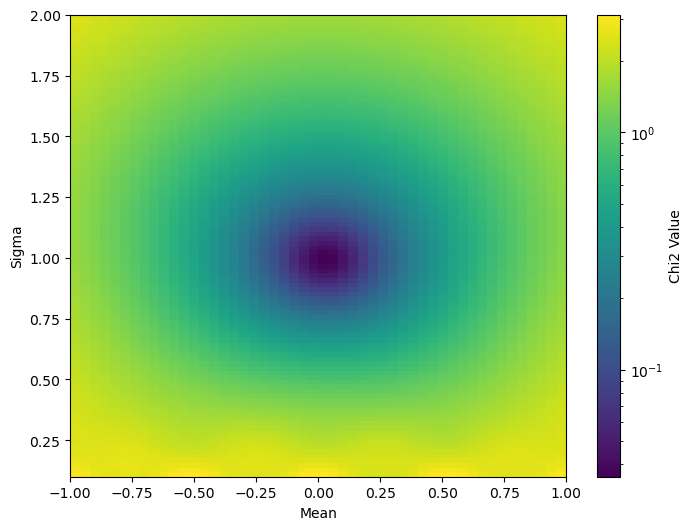

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


chi2[chi2 > 5] = 5
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(chi2), aspect='auto', origin='lower',
           extent=[means[0], means[-1], sigmas[0], sigmas[-1]],
           cmap='viridis', norm=LogNorm())
plt.colorbar(label='Chi2 Value')
plt.xlabel('Mean')
plt.ylabel('Sigma')
plt.show()

---
<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
توزیع کای‌دو (Chi-Square Distribution)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
توزیع کای‌دو یکی از توزیع‌های مهم در آمار است که معمولاً برای تحلیل داده‌ها و آزمون فرضیه‌ها استفاده می‌شود. این توزیع به‌خصوص در مواردی که با مجموع مربعات متغیرهای تصادفی سر و کار داریم، کاربرد دارد.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
اگر X1,X2,…,Xk​ متغیرهای تصادفی مستقل با توزیع نرمال استاندارد باشند، آنگاه مجموع مربعات آن‌ها:

$
Q = \sum_{i=1}^k X_i^2
$


<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
خطای کای‌دو به داده‌هایی که عدم قطعیت کمتری دارند، وزن بیشتری می‌دهد. این ویژگی باعث می‌شود که داده‌های دقیق‌تر تأثیر بیشتری در فرآیند فیت کردن داشته باشند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
     اگر داده‌ها دارای خطای اندازه‌گیری (σ) باشند، خطای کای‌دو به طور خودکار به داده‌های با خطای کمتر وزن بیشتری می‌دهد.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
     داده‌هایی که به شدت با مدل تطابق ندارند (داده‌های پرت)، به دلیل وزن کم‌تری که دریافت می‌کنند، تأثیر کمتری بر فرآیند فیت کردن دارند.

In [5]:
k = 3
x = np.linspace(0, 20, 1000)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 14px; ">
از توزیع کای‌دو با k درجه آزادی پیروی می‌کند. این توزیع با نماد χ2(k) نشان داده می‌شود.



<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
تابع چگالی احتمال (PDF):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تابع چگالی احتمال توزیع کای‌دو به صورت زیر تعریف می‌شود:
( Γ تابع گاما )

$ f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2}, \quad x > 0$

In [6]:
from scipy.special import gamma
def chi2_pdf(x, k):

    return np.where(x <= 0, 0, (1 / (2 ** (k / 2) * gamma(k / 2)) * x ** (k / 2 - 1) * np.exp(-x / 2)))

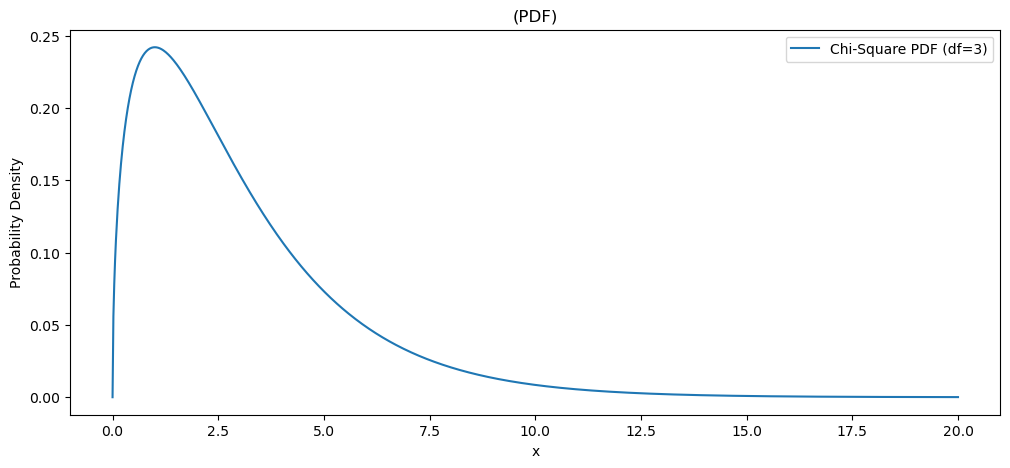

In [7]:
pdf = chi2_pdf(x, k)


plt.figure(figsize=(12, 5))
plt.plot(x, pdf, label=f'Chi-Square PDF (df={k})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('(PDF)')
plt.legend()


plt.show()

___
<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
برازش  کردن داده‌ها (Data Fitting)
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
فیت کردن داده‌ها به معنای یافتن یک مدل ریاضی است که به بهترین شکل داده‌های مشاهده‌شده را توصیف کند. این مدل‌ها می‌توانند خطی، نمایی، یا هر شکل دیگری باشند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    هدف فیت کردن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
        یافتن پارامترهای مدل که بهترین تطابق را با داده‌ها دارند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
        پیش‌بینی رفتار سیستم بر اساس مدل فیت شده.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    روش حداقل مربعات (Least Squares):
    در این روش، مجموع مربعات تفاوت بین داده‌های مشاهده‌شده و مقادیر پیش‌بینی‌شده توسط مدل کمینه می‌شود:

$ \chi^2 = \sum_{i=1}^N \frac{(y_i - f(x_i; \theta))^2}{\sigma_i^2} $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    yi​ داده‌های مشاهده‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    f(xi​;θ) مدل پیش‌بینی‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    σi​ خطای اندازه‌گیری داده‌ها،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    θ پارامترهای مدل است.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
معیار کای‌دو (χ2) برای ارزیابی کیفیت برازش استفاده می‌شود. هرچه مقدار χ2 کوچک‌تر باشد، برازش بهتر است

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
اگر χ2≈N (N تعداد داده‌ها)، فیت خوب است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
اگر χ2≫N، فیت ضعیف است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
اگر χ2≪N، ممکن است خطاهای اندازه‌گیری بسیار کم گرفته شده‌باشند.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
کای‌دو نرمال‌شده: برای مقایسه مدل‌های مختلف، از کای‌دو نرمال‌شده (χ²/ndf) استفاده می‌شود، که در آن ndf درجه آزادی است:

$ {χ^2}/{ndf}=\frac{χ^2}{n−p}​ $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
n: تعداد داده‌ها.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
p: تعداد پارامترهای مدل.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
اگر χ²/ndf نزدیک به ۱ باشد، مدل به‌درستی فیت شده است. مقادیر بسیار بزرگ‌تر از ۱ نشان‌دهنده عدم تطابق مدل با داده‌ها، و مقادیر بسیار کوچک‌تر از ۱ نشان‌دهنده Overfitting است.

درجه آزادی واقعی: 4, درجه آزادی برآوردشده: 3.41


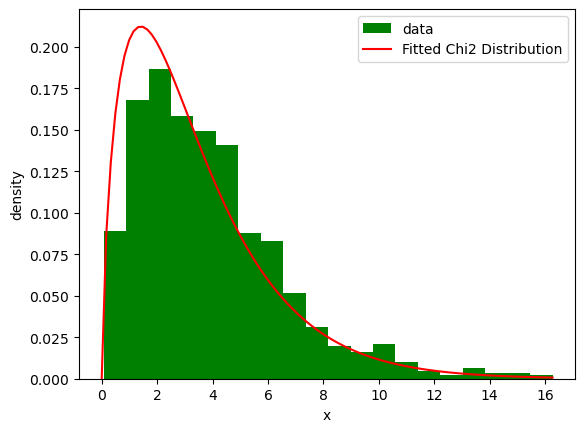

In [8]:
from scipy.optimize import minimize

np.random.seed(0)
k_true = 4
data = np.random.chisquare(k_true, 1000)

def chi2_error(params, data):

    k = params[0]


    expected = chi2_pdf(np.sort(data), k)
    observed, _ = np.histogram(data, bins=20, density=True)
    chi2_value = np.sum((observed - expected[:len(observed)]) ** 2 / expected[:len(observed)])
    return chi2_value




initial_guess = [2]


result = minimize(chi2_error, initial_guess, args=(data,))


estimated_k = result.x[0]


print(f"درجه آزادی واقعی: {k_true}, درجه آزادی برآوردشده: {estimated_k:.2f}")


plt.hist(data, bins=20, density=True, color='g', label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, chi2_pdf(x, estimated_k), 'r-', label='Fitted Chi2 Distribution')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تابع درست‌نمایی (Likelihood Function)
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تابع درست‌نمایی یکی از مفاهیم کلیدی در آمار است که برای یافتن بهترین پارامترهای مدل استفاده می‌شود.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    تابع درست‌نمایی، احتمال مشاهده داده‌ها را با توجه به پارامترهای مدل بیان می‌کند. برای داده‌های مستقل با توزیع نرمال، تابع درست‌نمایی به صورت زیر تعریف می‌شود:

$ \mathcal{L}(\theta) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left(-\frac{(y_i - f(x_i; \theta))^2}{2\sigma_i^2}\right) $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    θ پارامترهای مدل،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    yi​ داده‌های مشاهده‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    f(xi​;θ) مدل پیش‌بینی‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    σi​ خطای اندازه‌گیری است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
روش بیشینه‌سازی درست‌نمایی (Maximum Likelihood Estimation - MLE):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
در این روش، پارامترهای مدل (θ) به گونه‌ای انتخاب می‌شوند که تابع درست‌نمایی بیشینه شود. معمولاً برای سادگی، از لگاریتم تابع درست‌نمایی (Log-Likelihood) استفاده می‌کنیم:


$ \ln \mathcal{L}(\theta) = -\frac{1}{2} \sum_{i=1}^N \left[\frac{(y_i - f(x_i; \theta))^2}{\sigma_i^2} + \ln(2\pi\sigma_i^2)\right] $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
بیشینه‌سازی این تابع معادل کمینه‌سازی معیار کای‌دو (χ2) است

d:\conda\envs\cgcnn\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
d:\conda\envs\cgcnn\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


lambda واقعی: 0.5, lambda برآوردشده: 0.54


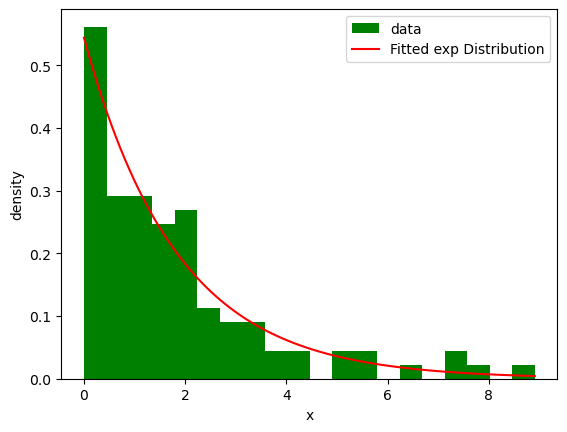

In [9]:
from scipy.stats import expon

np.random.seed(0)
lambda_true = 0.5
data = np.random.exponential(scale=1/lambda_true, size=100)



def negative_log_likelihood(params, data):
    lambda_ = params[0]

    if lambda_ <= 0:
        return np.inf

    log_likelihood = np.sum(expon.logpdf(data, scale=1/lambda_))
    return -log_likelihood


initial_guess = [5]


result = minimize(negative_log_likelihood , initial_guess, args=(data,))

estimated_lambda = result.x[0]
 
print(f"lambda واقعی: {lambda_true}, lambda برآوردشده: {estimated_lambda:.2f}")

plt.hist(data, bins=20, density=True, color='g', label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, expon.pdf(x, scale=1/estimated_lambda), 'r-', label='Fitted exp Distribution')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
مشتق اول توزیع  Chi-Square


<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
مشتق اول تابع کای‌دو نسبت به پارامترهای مدل (θ)، گرادیان تابع را نشان می‌دهد. گرادیان جهت شیب تابع را در فضای پارامترها مشخص می‌کند و به ما کمک می‌کند تا جهت حرکت به سمت مینیمم را پیدا کنیم.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    فرمول مشتق اول:

$ \frac{\partial \chi^2}{\partial \theta_j} = -2 \sum_{i=1}^N \frac{(y_i - f(x_i; \theta))}{\sigma_i^2} \cdot \frac{\partial f(x_i; \theta)}{\partial \theta_j} $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    اگر مشتق اول مثبت باشد، تابع در آن نقطه در حال افزایش است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    اگر مشتق اول منفی باشد، تابع در آن نقطه در حال کاهش است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    در نقطه مینیمم، مشتق اول صفر است .

In [10]:
def model(x, a, b, c):

    return a * np.exp(-b * x) + c * np.sin(x)



np.random.seed(0)
x_data = np.linspace(0, 15, 75)
true_params = [3.0, 1.5, 0.5]
y_data = model(x_data, *true_params) + np.random.normal(0, 0.3, len(x_data))        # نویز
errors = 0.3 * np.ones_like(y_data)

In [11]:
def chi_square(params, x, y, errors):
    a, b, c = params
    y_pred = model(x, a, b, c)
    
    return np.sum(((y - y_pred) / errors) ** 2)


def negative_log_likelihood(params, x, y, errors):
    a, b, c = params
    y_pred = model(x, a, b, c)
    sigma = errors
    log_likelihood = -np.sum((y - y_pred) ** 2 / (2 * sigma ** 2))

    return -log_likelihood



In [ ]:
#شبکه‌  پارامترها
a_values = np.linspace(2, 4, 100)
b_values = np.linspace(1.0, 2.0, 100)
c_values = np.linspace(0.0, 1.0, 100)

A, B, C = np.meshgrid(a_values, b_values, c_values, indexing='ij')




chi2_values = np.zeros_like(A)
log_likelihood_values = np.zeros_like(A)

for i in range(len(a_values)):
    for j in range(len(b_values)):
        for k in range(len(c_values)):
            params = [A[i, j, k], B[i, j, k], C[i, j, k]]
            chi2_values[i, j, k] = chi_square(params, x_data, y_data, errors)
            log_likelihood_values[i, j, k] = negative_log_likelihood(params, x_data, y_data, errors)



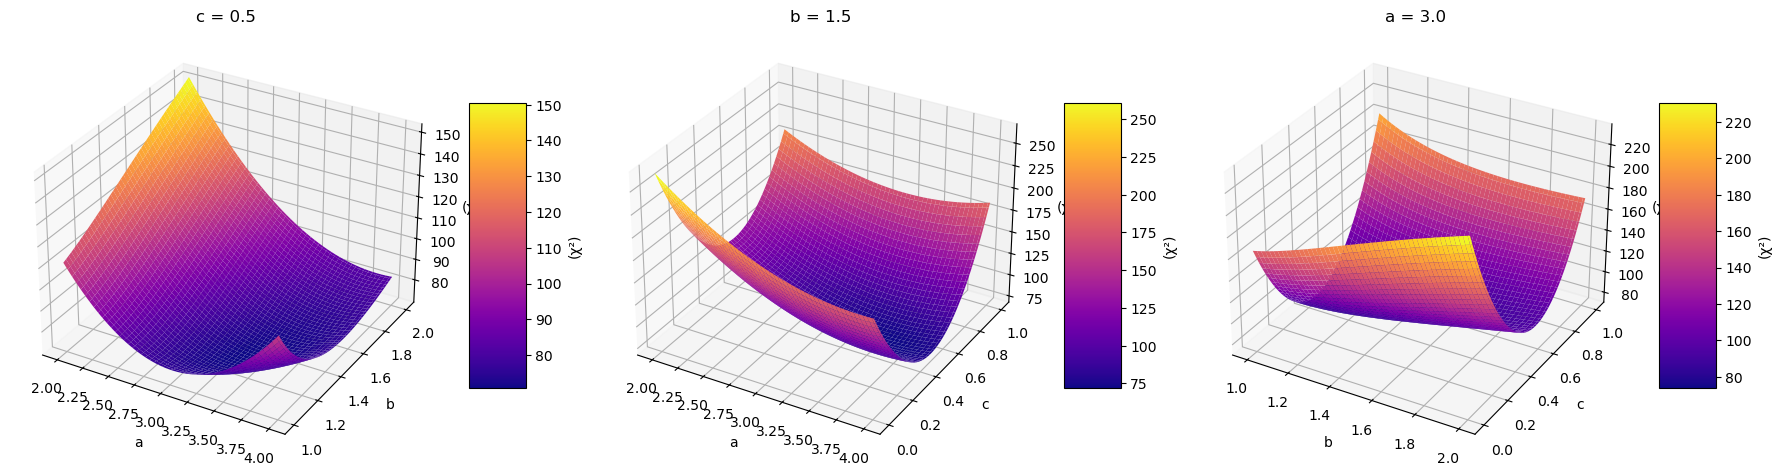

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

############################################################################################

c_fixed_index = np.argmin(np.abs(c_values - 0.5))
chi2_values_fixed_c = chi2_values[:, :, c_fixed_index]

surf1 = axes[0].plot_surface(A[:, :, c_fixed_index], B[:, :, c_fixed_index], chi2_values_fixed_c, cmap='plasma', edgecolor='none')
fig.colorbar(surf1, ax=axes[0], shrink=0.5, aspect=5, label='(χ²)')
axes[0].set_xlabel('a')
axes[0].set_ylabel('b')
axes[0].set_zlabel('(χ²)')
axes[0].set_title('c = 0.5')
############################################################################################

b_fixed_index = np.argmin(np.abs(b_values - 1.5))
chi2_values_fixed_b = chi2_values[:, b_fixed_index, : ]

surf2 = axes[1].plot_surface(A[:, b_fixed_index, :], C[:, b_fixed_index, :], chi2_values_fixed_b, cmap='plasma', edgecolor='none')
fig.colorbar(surf2, ax=axes[1], shrink=0.5, aspect=5, label='(χ²)')
axes[1].set_xlabel('a')
axes[1].set_ylabel('c')
axes[1].set_zlabel('(χ²)')
axes[1].set_title('b = 1.5')
#########################################################################################
a_fixed_index = np.argmin(np.abs(a_values - 3))
chi2_values_fixed_a = chi2_values[a_fixed_index, :, : ]

surf3 = axes[2].plot_surface(B[a_fixed_index, :, :], C[a_fixed_index, :, :], chi2_values_fixed_a, cmap='plasma', edgecolor='none')
fig.colorbar(surf3, ax=axes[2], shrink=0.5, aspect=5, label='(χ²)')
axes[2].set_xlabel('b')
axes[2].set_ylabel('c')
axes[2].set_zlabel('(χ²)')
axes[2].set_title('a = 3.0')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'contour Chi-Square')

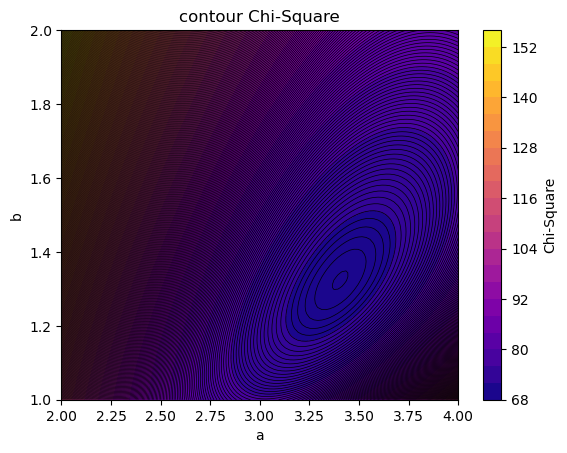

In [ ]:
contour1 = plt.contourf(A[:, :, c_fixed_index], B[:, :, c_fixed_index], chi2_values_fixed_c , levels=20, cmap='plasma')
plt.colorbar(contour1, label='Chi-Square')
plt.contour(A[:, :, c_fixed_index], B[:, :, c_fixed_index], chi2_values_fixed_c, levels=400, colors='black', linewidths=0.5)
plt.xlabel('a')
plt.ylabel('b')
plt.title('contour Chi-Square')

In [ ]:
initial_guess = [2.0, 1.0, 0.0]
result = minimize(chi_square, initial_guess, args=(x_data, y_data, errors))
optimized_params = result.x


y_fit = model(x_data, *optimized_params)

print(f"پارامترهای واقعی: {true_params}")
print(f"پارامترهای برآوردشده: {optimized_params}")

پارامترهای واقعی: [3.0, 1.5, 0.5]
پارامترهای برآوردشده: [3.40377044 1.31758578 0.4901782 ]


In [ ]:
chi2 = chi_square(optimized_params, x_data, y_data, errors)
ndf = len(x_data) - len(optimized_params)
chi2_ndf = chi2 / ndf
print(f"کای‌دو نرمال‌شده: {chi2_ndf:.2f}")

کای‌دو نرمال‌شده: 0.98


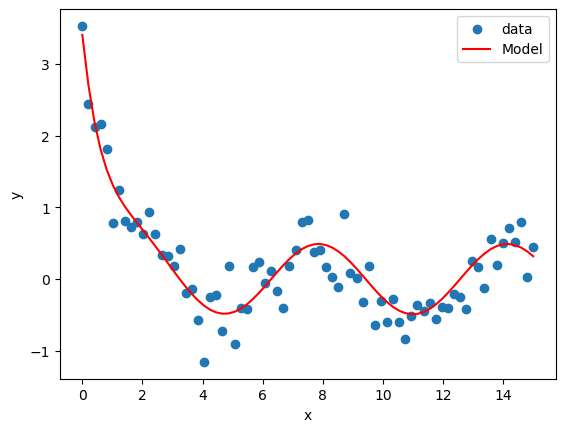

In [ ]:
plt.scatter(x_data, y_data, label='data')
plt.plot(x_data, y_fit, 'r-', label='Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
خطای کای‌دو به داده‌هایی که عدم قطعیت کمتری دارند، وزن بیشتری می‌دهد. این ویژگی باعث می‌شود که داده‌های دقیق‌تر تأثیر بیشتری در فرآیند فیت کردن داشته باشند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
     اگر داده‌ها دارای خطای اندازه‌گیری (σ) باشند، خطای کای‌دو به طور خودکار به داده‌های با خطای کمتر وزن بیشتری می‌دهد.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
     داده‌هایی که به شدت با مدل تطابق ندارند (داده‌های پرت)، به دلیل وزن کم‌تری که دریافت می‌کنند، تأثیر کمتری بر فرآیند فیت کردن دارند.

In [ ]:
from scipy.optimize import approx_fprime

def gradient(params, x, y, errors):
    return approx_fprime(params, chi_square, 1e-6, x, y, errors)

grad = gradient(optimized_params, x_data, y_data, errors)
print(f"گرادیان در نقطه مینیمم: {grad}")

گرادیان در نقطه مینیمم: [2.64321898e-05 6.53415100e-05 4.18637569e-04]


<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
   مشتق دوم 
توزیع
Chi-Square
:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
مشتق دوم تابع کای‌دو، ماتریس هسیان (Hessian Matrix) را تشکیل می‌دهد. این ماتریس رفتار تابع را در اطراف نقطه مینیمم توصیف می‌کند و به ما می‌گوید که آیا نقطه مینیمم یک مینیمم محلی است و یا رفتار مینیمم را میتواند بررسی کند .
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    فرمول مشتق دوم:

$ \frac{\partial^2 \chi^2}{\partial \theta_j \partial \theta_k} = 2 \sum_{i=1}^N \frac{1}{\sigma_i^2} \left( \frac{\partial f(x_i; \theta)}{\partial \theta_j} \cdot \frac{\partial f(x_i; \theta)}{\partial \theta_k} - (y_i - f(x_i; \theta)) \cdot \frac{\partial^2 f(x_i; \theta)}{\partial \theta_j \partial \theta_k} \right) $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
فرمول ماتریس هسیان:


$ H = \begin{bmatrix}
\frac{\partial^2 \chi^2}{\partial \theta_j^2} & \frac{\partial^2 \chi^2}{\partial \theta_j \partial \theta_k} \\
\frac{\partial^2 \chi^2}{\partial \theta_j \partial \theta_k} & \frac{\partial^2 \chi^2}{\partial \theta_k^2}
\end{bmatrix} = 2 (J^T J) $

In [ ]:
# محاسبه ماتریس ژاکوبین (مشتقات جزئی مدل نسبت به پارامترها)
def jacobian(params, x):
    a, b, c = params
    df_da = np.exp(-b * x)
    df_db = -a * x * np.exp(-b * x)
    df_dc = np.sin(x)
    return np.vstack([df_da, df_db, df_dc]).T

def hessian(params, x, y, errors):
    a, b, c = params
    y_pred = model(x, a, b, c)
    J = jacobian(params, x)
    H = 2 * np.dot(J.T, J / errors[:, np.newaxis] ** 2)
    return H


H = hessian(optimized_params, x_data, y_data, errors)
H

array([[  53.69808142,  -52.47696119,   39.69454305],
       [ -52.47696119,  138.77388098, -131.35053816],
       [  39.69454305, -131.35053816,  853.62830787]])

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
واریانس (Variance):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
واریانس معیاری برای اندازه‌گیری پراکندگی داده‌ها یا پارامترها است. در فیت کردن مدل‌ها، واریانس به ما کمک می‌کند تا عدم قطعیت در پارامترهای مدل را ارزیابی کنیم.

$Var(θ_i​)=Σ_{ii}​$

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن Σ ماتریس کواریانس است.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
 کواریانس (Covariance):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
کواریانس معیاری برای اندازه‌گیری همبستگی بین دو پارامتر است. اگر دو پارامتر مستقل باشند، کواریانس آن‌ها صفر است. در فیت کردن مدل‌ها، کواریانس به ما کمک می‌کند تا وابستگی بین پارامترها را بررسی کنیم.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
ارتباط ماتریس هسیان با ماتریس کواریانس:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    ماتریس کواریانس پارامترها از معکوس ماتریس هسیان (Hessian Matrix) تابع کای‌دو محاسبه می‌شود:

$  Σ=2(H)^{−1} $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    ماتریس کواریانس به ما می‌گوید که پارامترها چقدر عدم قطعیت دارند و چقدر با هم همبسته هستند.

In [ ]:
cov_matrix = np.linalg.inv(H)

variance_a = cov_matrix[0, 0]
variance_b = cov_matrix[1, 1]
variance_c = cov_matrix[2, 2]

covariance_ab = cov_matrix[0, 1]
covariance_ac = cov_matrix[0, 2]
covariance_bc = cov_matrix[1, 2]

print(f"پارامترهای واقعی: {true_params}")
print(f"پارامترهای برآوردشده: {optimized_params}")
print(f"واریانس a: {variance_a:.4f}")
print(f"واریانس b: {variance_b:.4f}")
print(f"واریانس c: {variance_c:.4f}")
print(f"کواریانس a و b: {covariance_ab:.4f}")
print(f"کواریانس a و c: {covariance_ac:.4f}")
print(f"کواریانس b و c: {covariance_bc:.4f}")
print("ماتریس کواریانس:\n", cov_matrix)


پارامترهای واقعی: [3.0, 1.5, 0.5]
پارامترهای برآوردشده: [3.40377044 1.31758578 0.4901782 ]
واریانس a: 0.0297
واریانس b: 0.0130
واریانس c: 0.0014
کواریانس a و b: 0.0116
کواریانس a و c: 0.0004
کواریانس b و c: 0.0015
ماتریس کواریانس:
 [[0.02965808 0.01159908 0.00040566]
 [0.01159908 0.01297069 0.00145647]
 [0.00040566 0.00145647 0.00137672]]


<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    اگر واریانس بزرگ باشد، پارامتر به‌دقت برآورد نشده است.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    کواریانس بین دو پارامتر (Cov(θj​,θk​)) به ما می‌گوید که آیا تغییر در یک پارامتر بر پارامتر دیگر تأثیر می‌گذارد.


<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
کانتورهای تابع کای‌دو معمولاً به شکل دایره هستند. این دایره‌ها ناشی از رفتار درجه دوم تابع کای‌دو در اطراف نقطه مینیمم هستند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
بیضی شدن کانتورها ناشی از تفاوت در حساسیت تابع کای‌دو به تغییرات پارامترها است.
اگر تابع کای‌دو به تغییرات یک پارامتر حساس‌تر باشد، محور بیضی در جهت آن پارامتر کشیده می‌شود

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
کانتورهای تابع کای‌دو ممکن است کج شوند. این کج شدن ناشی از همبستگی بین پارامترها است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    تفسیر ریاضیاتی:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
        اگر پارامترها مستقل باشند، ماتریس هسیان H قطری خواهد بود و کانتورها به صورت بیضی‌ یا دایره های هم‌محور با محورهای مختصات خواهند بود.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
        اگر پارامترها همبسته باشند، ماتریس هسیان H غیرقطری خواهد بود و کانتورها کج می‌شوند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
         برای مثال، اگر افزایش یک پارامتر باعث کاهش پارامتر دیگر شود، کانتورها در جهت مخالف محور پارامتر کج می‌شوند

____

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
منظم‌سازی (Regularization):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
منظم‌سازی روشی برای جلوگیری از بیش‌برازش (Overfitting) است. در این روش، یک ترم جریمه به تابع هدف اضافه می‌شود تا از بزرگ شدن بیش از حد پارامترها جلوگیری کند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
 دو روش رایج منظم‌سازی، L2 (Ridge Regression) و L1 (Lasso Regression) هستند.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
منظم‌سازی L2 (Ridge Regression):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
در این روش، ترم جریمه به صورت مجموع مربعات پارامترها تعریف می‌شود:


$ χ_{reg}^2=χ^2+λ∑_jθ_j^2 $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    χ2: تابع کای‌دو،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    λ: پارامتر منظم‌سازی،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    θj​: پارامترهای مدل.

In [ ]:
def chi_square_ridge(params, x, y, errors, lambda_):
    a, b, c = params
    y_pred = model(x, a, b, c)
    chi2 = np.sum(((y - y_pred) / errors) ** 2)
    regularization = lambda_ * (a**2 + b**2 + c**2)
    return chi2 + regularization



lambda_ridge = 0.01
initial_guess = [2.0, 1.0, 0.0]
result_ridge = minimize(chi_square_ridge, initial_guess, args=(x_data, y_data, errors, lambda_ridge))
optimized_params_ridge = result_ridge.x

print(f"پارامترهای واقعی: {true_params}")
print(f"پارامترهای برآوردشده با منظم‌سازی L2: {optimized_params_ridge}")

پارامترهای واقعی: [3.0, 1.5, 0.5]
پارامترهای برآوردشده با منظم‌سازی L2: [3.40138931 1.31637997 0.4900918 ]


<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
منظم‌سازی L1 (Lasso Regression):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
در این روش، ترم جریمه به صورت مجموع قدر مطلق پارامترها تعریف می‌شود:


$ χ_{reg}^2=χ^2+λ∑_j∣θ_j∣$

In [ ]:
def chi_square_lasso(params, x, y, errors, lambda_):
    a, b, c = params
    y_pred = model(x, a, b, c)
    chi2 = np.sum(((y - y_pred) / errors) ** 2)
    regularization = lambda_ * (np.abs(a) + np.abs(b) + np.abs(c))
    return chi2 + regularization


lambda_lasso = 0.01
result_lasso = minimize(chi_square_lasso, initial_guess, args=(x_data, y_data, errors, lambda_lasso))
optimized_params_lasso = result_lasso.x

print(f"پارامترهای واقعی: {true_params}")
print(f"پارامترهای برآوردشده با منظم‌سازی L1: {optimized_params_lasso}")

پارامترهای واقعی: [3.0, 1.5, 0.5]
پارامترهای برآوردشده با منظم‌سازی L1: [3.40334183 1.31731186 0.49014416]


___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
تحلیل حساسیت (Sensitivity Analysis):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تحلیل حساسیت به ما کمک می‌کند تا تأثیر تغییرات پارامترها بر خروجی مدل را بررسی کنیم. این تحلیل به ویژه در مدل‌های پیچیده و غیرخطی بسیار مفید است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
شاخص حساسیت معیاری برای اندازه‌گیری تأثیر تغییرات یک پارامتر بر خروجی مدل است. برای مثال، شاخص حساسیت مرتبه اول به صورت زیر تعریف می‌شود:

$ S_i​=\frac{Var(Y)}{Var(Y∣θ_i​)} $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    Y: خروجی مدل،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    θi​: پارامتر مدل.

In [ ]:
# تعریف تابع برای تحلیل حساسیت
def sensitivity_analysis(params, x, param_index, delta=0.5):

    param_values = np.linspace(params[param_index] - delta, params[param_index] + delta, 100)
    y_values = []

    
    for value in param_values:
        new_params = params.copy()
        new_params[param_index] = value
        y_pred = model(x, *new_params)
        y_values.append(y_pred)

    y_values = np.array(y_values)
    var_y = np.var(y_values, axis=1)
    return param_values, var_y





param_index = 0
param_values_a, var_y_a = sensitivity_analysis(optimized_params_ridge, x_data, param_index)

param_index = 1
param_values_b, var_y_b = sensitivity_analysis(optimized_params_ridge, x_data, param_index)


param_index = 2
param_values_c, var_y_c = sensitivity_analysis(optimized_params_ridge, x_data, param_index)


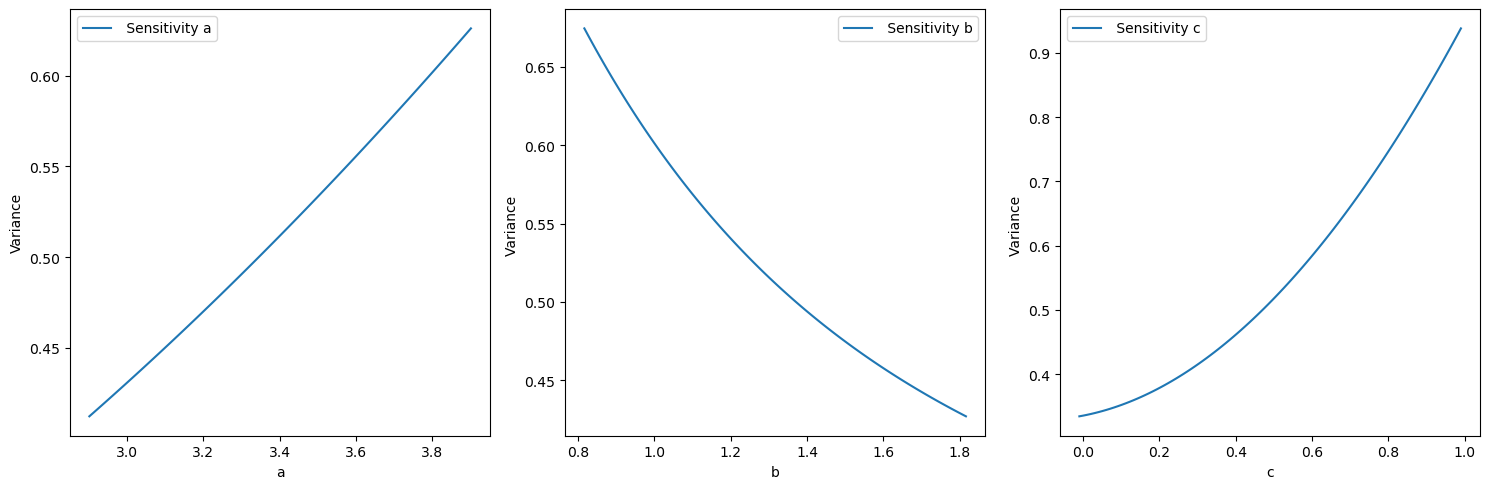

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(param_values_a, var_y_a, label=' Sensitivity a')
plt.xlabel('a')
plt.ylabel('Variance')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(param_values_b, var_y_b, label=' Sensitivity b')
plt.xlabel('b')
plt.ylabel('Variance ')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(param_values_c, var_y_c, label=' Sensitivity c')
plt.xlabel('c')
plt.ylabel('Variance ')
plt.legend()

plt.tight_layout()
plt.show()